In [3]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tiktoken
from openai import OpenAI
from dotenv import load_dotenv
from time import sleep
from IPython.display import display, HTML
import random


load_dotenv()

client = OpenAI()

In [2]:
epistimalogical_features = {
    "behavior": {
        "Social": {
            "Description": "Refers to beliefs, perceptions, preferences, and socially constructed rules that govern human experience; can be 'real' or opinion, but is intrinsically of human origins.",
            "Examples": [
                "I exist and am the same person I was yesterday.",
                "He yelled at me because he was angry.",
                "There are seven days in the week.",
            ],
        },
        "Physical": {
            "Description": "Refers to objective features of the world as described by physics, biology, engineering, mathematics, or other natural rules; can be measured empirically or derived logically.",
            "Examples": [
                "Men on average are taller than women.",
                "The Earth is the third planet from the Sun.",
                "Ants are smaller than elephants.",
            ],
        },
    },
    "everyday": {
        "Everyday": {
            "Description": "People encounter, or could encounter, situations like this in the course of their ordinary, everyday experiences.",
            "Examples": [
                "Touching a hot stove will burn you.",
                "Commuting at rush hour takes longer.",
                "It is rude to jump the line.",
            ],
        },
        "Abstract": {
            "Description": "Refers to regularities or conclusions that cannot be observed or arrived at solely through individual experience.",
            "Examples": [
                "Capitalism is a better economic system than Communism.",
                "Strict gun laws save lives.",
                "God exists.",
            ],
        },
    },
    "figure of speech": {
        "Figure of Speech": {
            "Description": "Contains an aphorism, metaphor, hyperbole.",
            "Examples": [
                "Birds of a feather flock together.",
                "A friend to all is a friend to none.",
            ],
        },
        "Literal Language": {
            "Description": "Plain and ordinary language that means exactly what it says.",
            "Examples": [
                "The sky is blue.",
                "Elephants are larger than dogs.",
                "Abraham Lincoln was a great president.",
            ],
        },
    },
    "judgment": {
        "Normative": {
            "Description": "Refers to a judgment, belief, value, social norm or convention.",
            "Examples": [
                "If you are going to the office, you should wear business attire, not a bathing suit.",
                "Treat others how you want them to treat you.",
                "Freedom is a fundamental human right.",
            ],
        },
        "Positive": {
            "Description": "Refers to something in the world such as an empirical regularity or scientific law.",
            "Examples": [
                "Hot things will burn you.",
                "The sun rises in the east and sets in the west.",
            ],
        },
    },
    "opinion": {
        "Opinion": {
            "Description": "Something that someone might think is true, or wants others to think is true, but can’t be demonstrated to be objectively correct or incorrect; it is inherently subjective.",
            "Examples": [
                "FDR was the greatest US president of the 20th Century.",
                "The Brooklyn Bridge is prettier than the Golden Gate.",
                "Vaccine mandates are a tolerable imposition on individual freedom.",
            ],
        },
        "Factual": {
            "Description": "Something that can be demonstrated to be correct or incorrect, independently of anyone’s opinion.",
            "Examples": [
                "The earth is the third planet from the sun.",
                "Obama was the 24th president of the United States.",
                "It will be sunny next Tuesday.",
            ],
        },
    },
    "reasoning": {
        "Knowledge": {
            "Description": "The claim refers to some observation about the world; it may be true or false, opinion or fact, subjective or objective.",
            "Examples": [
                "The sun rises in the east and sets in the west.",
                "Dogs are nicer than cats.",
                "Glasses break when they are dropped.",
            ],
        },
        "Reasoning": {
            "Description": "The claim presents a conclusion that is arrived at by combining knowledge and logic.",
            "Examples": [
                "The sun is in the east, therefore it is morning.",
                "My dog is wagging its tail, therefore it is happy.",
                "The glass fell off the table, therefore it will break and the floor will become wet.",
            ],
        },
    },
}

In [3]:
json.dumps(epistimalogical_features)

'{"behavior": {"Social": {"Description": "Refers to beliefs, perceptions, preferences, and socially constructed rules that govern human experience; can be \'real\' or opinion, but is intrinsically of human origins.", "Examples": ["I exist and am the same person I was yesterday.", "He yelled at me because he was angry.", "There are seven days in the week."]}, "Physical": {"Description": "Refers to objective features of the world as described by physics, biology, engineering, mathematics, or other natural rules; can be measured empirically or derived logically.", "Examples": ["Men on average are taller than women.", "The Earth is the third planet from the Sun.", "Ants are smaller than elephants."]}}, "everyday": {"Everyday": {"Description": "People encounter, or could encounter, situations like this in the course of their ordinary, everyday experiences.", "Examples": ["Touching a hot stove will burn you.", "Commuting at rush hour takes longer.", "It is rude to jump the line."]}, "Abstrac

In [4]:
design_point = {
    "behavior": "Social",
    "everyday": "Everyday",
    "figure of speech": "Figure of Speech",
    "judgment": "Normative",
    "opinion": "Opinion",
    "reasoning": "Knowledge",
}

In [5]:
wikipedia_categories = [
    "General reference",
    "Culture and the arts",
    "Geography and places",
    "Health and fitness",
    "History and events",
    "Human activities",
    "Mathematics and logic",
    "Natural and physical sciences",
    "People and self",
    "Philosophy and thinking",
    "Religion and belief systems",
    "Society and social sciences",
    "Technology and applied sciences",
]

In [6]:
prompt = f'Give me the all statements that best belong to the following general category "{wikipedia_categories[0]}" with epistimalogical features \n'

for key in epistimalogical_features.keys():
    sub_key = design_point[key]
    prompt += f"\n'{key}' is '{sub_key}' meaning {epistimalogical_features[key][sub_key]['Description']}"

print(prompt)

Give me the all statements that best belong to the following general category "General reference" with epistimalogical features 

'behavior' is 'Social' meaning Refers to beliefs, perceptions, preferences, and socially constructed rules that govern human experience; can be 'real' or opinion, but is intrinsically of human origins.
'everyday' is 'Everyday' meaning People encounter, or could encounter, situations like this in the course of their ordinary, everyday experiences.
'figure of speech' is 'Figure of Speech' meaning Contains an aphorism, metaphor, hyperbole.
'judgment' is 'Normative' meaning Refers to a judgment, belief, value, social norm or convention.
'opinion' is 'Opinion' meaning Something that someone might think is true, or wants others to think is true, but can’t be demonstrated to be objectively correct or incorrect; it is inherently subjective.
'reasoning' is 'Knowledge' meaning The claim refers to some observation about the world; it may be true or false, opinion or fa

In [71]:
completion = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {
            "role": "system",
            "content": "Write 100 short common sense claims in Farsi that are open to different interpretations and has all the properties mentioned below. Do not explain the result, just provide a single short claim in a JSON list under the key 'statements'.",
        },
        {"role": "user", "content": prompt},
    ],
    response_format={"type": "json_object"},
    presence_penalty=-1,
)

print(completion.choices[0].message)

ChatCompletionMessage(content='{\n  "statements": [\n    "درخت دوستی بنشان که کام دل به بار آرد.",\n    "همیشه حق با مشتری نیست.",\n    "یک دست صدا ندارد.",\n    "در کار خیر حاجت هیچ استخاره نیست.",\n    "هر که بامش بیش، برفش بیشتر.",\n    "هر که طاووس خواهد جور هندوستان کشد.",\n    "هر چیزی به وقتش خوش است.",\n    "نابرده رنج، گنج میسر نمی\u200cشود.",\n    "آب در کوزه و ما تشنه لبان می\u200cگردیم.",\n    "تا تنور گرم است باید نان را چسباند.",\n    "نیمه پر لیوان را ببین.",\n    "علف باید به دهن بزی شیرین بیاید.",\n    "هرکه خربزه می\u200cخورد پای لرزش هم می\u200cنشیند.",\n    "به مرگ بگیر که به تب راضی\u200cشود.",\n    "گنج در ویرانه است.",\n    "خود کرده را تدبیر نیست.",\n    "آب که از سر گذشت، چه یک نی چه صدهزار نی.",\n    "از دل برود هر آنچه از دیده برفت.",\n    "خود را به کوچه علی چپ زدن.",\n    "گاو نر پایش همیشه در بقالی است.",\n    "کار نیک از پر کردن صمیم می\u200cشود.",\n    "دل به دل راه دارد.",\n    "هرجا کار می\u200cکنند ما هم هستیم.",\n    "هرجا کار می\u200cکنند من همان\u2

In [200]:
json.loads(completion.choices[0].message.content)

{'statements': ['Actions speak louder than words.',
  'Beauty is in the eye of the beholder.',
  'Birds of a feather flock together.',
  "Money can't buy happiness.",
  'Laughter is the best medicine.',
  'Time heals all wounds.',
  'The early bird catches the worm.',
  'Two heads are better than one.',
  'When in Rome, do as the Romans do.',
  'Every cloud has a silver lining.',
  'Actions have consequences.',
  'The pen is mightier than the sword.',
  'Absence makes the heart grow fonder.',
  'Practice makes perfect.',
  "You can't judge a book by its cover.",
  'A picture is worth a thousand words.',
  'Honesty is the best policy.',
  'The grass is always greener on the other side.',
  'Better late than never.',
  'Love makes the world go round.',
  'You reap what you sow.',
  'The squeaky wheel gets the grease.',
  'You can’t have your cake and eat it too.',
  'Good things come to those who wait.',
  'Beauty is only skin deep.',
  'What doesn’t kill you makes you stronger.',
  'You

## Create batch statement generation job

In [16]:
def get_dict(id, prompt):
    return {
        "custom_id": f"request-{id}",
        "method": "POST",
        "url": "/v1/chat/completions",
        "body": {
            "model": "gpt-4o",
            "messages": [
                {
                    "role": "system",
                    # "content": "Write 100 short common sense claim that has all of the following properties. Do not explain the result, just provide a single short claim in a JSON list.",
                    # "content": "Write 100 short common sense claims that are open to different interpretations and has all the properties mentioned below. Do not explain the result, just provide a single short claim in a JSON list under the key 'statements'.",
                    "content": "Generate a list of 200 unique, single-sentence statements that have the air of common sense. These statements should be concise and widely applicable. Do not explain the result, just provide a single short claim in a JSON list. The statements should possess the following properties:",
                },
                {"role": "user", "content": prompt},
            ],
            "response_format": {"type": "json_object"},
            "max_tokens": 4094,
            "temperature": 1,
        },
    }


with open("statement-batch.jsonl", "w") as file:
    for i in range(0, 20):
        data = get_dict(i, prompt)
        file.write(json.dumps(data) + "\n")

### Upload the data to openai batch api

In [17]:

batch_input_file = client.files.create(
  file=open("statement-batch.jsonl", "rb"),
  purpose="batch"
)

Create the batch job with the uploaded data

In [18]:
# Create a batch
statement_batch_job = client.batches.create(
    input_file_id=batch_input_file.id,
    endpoint="/v1/chat/completions",
    completion_window="24h",
    metadata={"description": "statement generation batch"},
)

In [19]:
statement_batch_job

Batch(id='batch_66f92dec4640819091c921bf35f25164', completion_window='24h', created_at=1727606252, endpoint='/v1/chat/completions', input_file_id='file-URQnEARHfjXEqHYlROyBIJ8t', object='batch', status='validating', cancelled_at=None, cancelling_at=None, completed_at=None, error_file_id=None, errors=None, expired_at=None, expires_at=1727692652, failed_at=None, finalizing_at=None, in_progress_at=None, metadata={'description': 'statement generation batch'}, output_file_id=None, request_counts=BatchRequestCounts(completed=0, failed=0, total=0))

In [20]:
while (
    statement_batch_job.status == "in_progress"
    or statement_batch_job.status == "validating"
):
    statement_batch_job = client.batches.retrieve(statement_batch_job.id)
    print(statement_batch_job.status)
    if statement_batch_job.status == "failed":
        print(statement_batch_job.error)
        break
    elif statement_batch_job.status == "completed":
        print(statement_batch_job.output_file_id)
        break
    sleep(20)

in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
in_progress
completed
file-UpnErysh7Ihg9HhgcAX0u8ej


In [21]:
if statement_batch_job.status == "completed":
    print("Batch job completed")
    output_file = client.files.content(statement_batch_job.output_file_id)
else:
    print("Batch job status:", statement_batch_job.status)

Batch job completed


In [22]:
with open("statement-batch-output.jsonl", "w") as file:
    file.write(output_file.text)

In [23]:
statement_list = []

with open("statement-batch-output.jsonl", "r") as file:
    for idx, line in enumerate(file):
        try:
            data = json.loads(line)
            print(idx, data["response"]["body"]["usage"])
            statement: str = data["response"]["body"]["choices"][0]["message"]["content"]
            # print(json.loads(statement)["statements"])
            statement_list.extend(json.loads(statement)["statements"])
        except Exception as e:
            print(e)


df = pd.DataFrame(statement_list, columns=["statement"])
df.drop_duplicates(inplace=True)
df.to_csv("statement-batch-output-2.csv", index=False)

0 {'prompt_tokens': 284, 'completion_tokens': 1781, 'total_tokens': 2065, 'completion_tokens_details': {'reasoning_tokens': 0}}
1 {'prompt_tokens': 284, 'completion_tokens': 1513, 'total_tokens': 1797, 'completion_tokens_details': {'reasoning_tokens': 0}}
2 {'prompt_tokens': 284, 'completion_tokens': 1659, 'total_tokens': 1943, 'completion_tokens_details': {'reasoning_tokens': 0}}
3 {'prompt_tokens': 284, 'completion_tokens': 1512, 'total_tokens': 1796, 'completion_tokens_details': {'reasoning_tokens': 0}}
4 {'prompt_tokens': 284, 'completion_tokens': 1776, 'total_tokens': 2060, 'completion_tokens_details': {'reasoning_tokens': 0}}
5 {'prompt_tokens': 284, 'completion_tokens': 1723, 'total_tokens': 2007, 'completion_tokens_details': {'reasoning_tokens': 0}}
6 {'prompt_tokens': 284, 'completion_tokens': 1537, 'total_tokens': 1821, 'completion_tokens_details': {'reasoning_tokens': 0}}
7 {'prompt_tokens': 284, 'completion_tokens': 1594, 'total_tokens': 1878, 'completion_tokens_details': {

In [207]:
encoding = tiktoken.get_encoding("o200k_base")

tools = [
    {
        "type": "function",
        "function": {
            "name": "get_statement_rating",
            "description": "Rate the statement common sense level",
            "parameters": {
                "type": "object",
                "properties": {
                    "i_agree": {
                        "type": "string",
                        "description": "Do you agree with this statement?",
                        "enum": ["yes", "no"],
                    },
                    "others_agree": {
                        "type": "string",
                        "description": "Do you think most other people would agree with this statement?",
                        "enum": ["yes", "no"],
                    },
                    "explanation": {
                        "type": "string",
                        "description": "An explanation of how the answer was created",
                    },
                },
                "required": [
                    "i_agree",
                    "others_agree",
                    "explanation",
                ],
            },
        },
    }
]

tokens = {
    "yes": encoding.encode("yes"),
    "no": encoding.encode("no"),
    "Yes": encoding.encode("Yes"),
    "No": encoding.encode("No"),
}

statement = "What goes around, comes around."

completion = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {
            "role": "system",
            "content": "You are an average person living in the United States. Your are given a statement. Rate the statement common sense level.",
        },
        {
            "role": "user",
            "content": f"Do you agree with this `{statement}`? answer with only Yes or No.",
        },
    ],
    max_tokens=100,
    logprobs=True,
    top_logprobs=5,
    logit_bias={
        "6763": 100,
        "13022": 100,
        "1750": 100,
        "3160": 100,
    },
)

print(completion)

ChatCompletion(id='chatcmpl-A0wT5nteXiHe2R05Gpgy6OzELomPW', choices=[Choice(finish_reason='length', index=0, logprobs=ChoiceLogprobs(content=[ChatCompletionTokenLogprob(token='Yes', bytes=[89, 101, 115], logprob=-5.5122365e-07, top_logprobs=[TopLogprob(token='Yes', bytes=[89, 101, 115], logprob=-5.5122365e-07), TopLogprob(token='No', bytes=[78, 111], logprob=-14.875001), TopLogprob(token=' Yes', bytes=[32, 89, 101, 115], logprob=-15.750001), TopLogprob(token='YES', bytes=[89, 69, 83], logprob=-18.75), TopLogprob(token='\n', bytes=[10], logprob=-19.625)]), ChatCompletionTokenLogprob(token='No', bytes=[78, 111], logprob=-9999.0, top_logprobs=[TopLogprob(token='<|end|>', bytes=None, logprob=-0.5759504), TopLogprob(token='.', bytes=[46], logprob=-0.8259504), TopLogprob(token='.\n', bytes=[46, 10], logprob=-12.325951), TopLogprob(token='。', bytes=[227, 128, 130], logprob=-12.825951), TopLogprob(token='<|end|>', bytes=None, logprob=-12.825951)]), ChatCompletionTokenLogprob(token='Yes', bytes

In [208]:
completion.to_dict()

{'id': 'chatcmpl-A0wT5nteXiHe2R05Gpgy6OzELomPW',
 'choices': [{'finish_reason': 'length',
   'index': 0,
   'logprobs': {'content': [{'token': 'Yes',
      'bytes': [89, 101, 115],
      'logprob': -5.5122365e-07,
      'top_logprobs': [{'token': 'Yes',
        'bytes': [89, 101, 115],
        'logprob': -5.5122365e-07},
       {'token': 'No', 'bytes': [78, 111], 'logprob': -14.875001},
       {'token': ' Yes', 'bytes': [32, 89, 101, 115], 'logprob': -15.750001},
       {'token': 'YES', 'bytes': [89, 69, 83], 'logprob': -18.75},
       {'token': '\n', 'bytes': [10], 'logprob': -19.625}]},
     {'token': 'No',
      'bytes': [78, 111],
      'logprob': -9999.0,
      'top_logprobs': [{'token': '<|end|>',
        'bytes': None,
        'logprob': -0.5759504},
       {'token': '.', 'bytes': [46], 'logprob': -0.8259504},
       {'token': '.\n', 'bytes': [46, 10], 'logprob': -12.325951},
       {'token': '。', 'bytes': [227, 128, 130], 'logprob': -12.825951},
       {'token': '<|end|>', 'byt

In [31]:
import re
import math


def clean_logprobs(response, tokens):
    def compute_prob(token):
        words = [
            {
                "word": next(
                    (
                        token
                        for token in tokens
                        if re.search(
                            f"{re.escape(token)}", word_data["token"], re.IGNORECASE
                        )
                    ),
                    None,
                ),
                "prob": math.exp(word_data["logprob"]),
            }
            for choice in response["choices"]
            for logprobs in choice["logprobs"]["content"]
            for word_data in logprobs["top_logprobs"]
        ]

        words = [word for word in words if word["word"]]
        total_prob = sum(word["prob"] for word in words)

        normalized_words = [
            {**word, "prob": word["prob"] / total_prob} for word in words
        ]

        return sum(word["prob"] for word in normalized_words if word["word"] == token)

    return {token: compute_prob(token) for token in tokens}


# clean_logprobs(completion.to_dict(), ["yes", "no"])

In [38]:
top_two_logprobs = completion.choices[0].logprobs.content[0].top_logprobs

html_content = ""
for i, logprob in enumerate(top_two_logprobs, start=1):
    html_content += (
        f"<span style='color: green'>Output token {i}:</span> {logprob.token}, "
        f"<span style='color: darkorange'>logprobs:</span> {logprob.logprob}, "
        f"<span style='color: magenta'>linear probability:</span> {np.round(np.exp(logprob.logprob)*100,2)}%<br>"
    )
display(HTML(html_content))

NameError: name 'completion' is not defined

In [35]:
def get_rating_dict(id, statement):
    return (
        {
            "custom_id": f"request-{id}-1",
            "method": "POST",
            "url": "/v1/chat/completions",
            "body": {
                "model": "gpt-4o",
                "messages": [
                    {
                        "role": "system",
                        "content": "You are an average person living in the United States. Your are given a statement. Rate the statement common sense level.",
                    },
                    {
                        "role": "user",
                        "content": f"Do you agree with this statement: `{statement}`? answer with only Yes Or No.",
                    },
                ],
                "max_tokens": 1,
                "logprobs": True,
                "top_logprobs": 10,
                "logit_bias": {
                    "6763": 100,
                    "13022": 100,
                    "1750": 100,
                    "3160": 100,
                },
            },
        },
        {
            "custom_id": f"request-{id}-2",
            "method": "POST",
            "url": "/v1/chat/completions",
            "body": {
                "model": "gpt-4o",
                "messages": [
                    {
                        "role": "system",
                        "content": "You are an average person living in the United States. Your are given a statement. Rate the statement common sense level.",
                    },
                    {
                        "role": "user",
                        "content": f"Do you think most people would agree with this statement: `{statement}`? answer with only Yes Or No.",
                    },
                ],
                "max_tokens": 1,
                "logprobs": True,
                "top_logprobs": 10,
                "logit_bias": {
                    "6763": 100,
                    "13022": 100,
                    "1750": 100,
                    "3160": 100,
                },
            },
        },
    )


statements = pd.read_csv("statement-batch-output.csv")


with open("statement-rating-batch.jsonl", "w") as file:
    for s in statements.iterrows():
        data = get_rating_dict(id=s[0], statement=s[1]["statement"])
        file.write(json.dumps(data[0]) + "\n")
        file.write(json.dumps(data[1]) + "\n")

In [36]:
# Upload the batch input file
batch_rating_input_file = client.files.create(
    file=open("statement-rating-batch.jsonl", "rb"), purpose="batch"
)


# Create a batch
statement_rating_batch_job = client.batches.create(
    input_file_id=batch_rating_input_file.id,
    endpoint="/v1/chat/completions",
    completion_window="24h",
    metadata={"description": "statement rating batch"},
)

In [125]:
while (
    statement_rating_batch_job.status == "in_progress"
    or statement_rating_batch_job.status == "validating"
):
    statement_rating_batch_job = client.batches.retrieve(statement_rating_batch_job.id)
    print(statement_rating_batch_job.status)
    if statement_rating_batch_job.status == "failed":
        print(statement_rating_batch_job.error)
        break
    elif statement_rating_batch_job.status == "completed":
        print(statement_rating_batch_job.output_file_id)
        break
    sleep(20)

completed
file-G8DFrD6MPzKkiHs77YSGguQr


In [126]:
if statement_rating_batch_job.status == "completed":
    print("Batch job completed")
    output_rating_file = client.files.content(statement_rating_batch_job.output_file_id)
else:
    print("Batch job status:", statement_rating_batch_job.status)

with open("statement-rating-batch-output.jsonl", "w") as file:
    file.write(output_rating_file.text)

Batch job completed


In [28]:
ratings_df = pd.read_csv('features/ratings.csv')

In [32]:
pd.DataFrame(ratings_df.groupby(
    ["behavior", "everyday", "figure_of_speech", "judgment", "opinion", "reasoning"]
).count()).sort_values(by="statement", ascending=False)

statement  hash
behavior everyday figure_of_speech judgment opinion reasoning                 
True     True     False            True     True    False            484   484
         False    False            True     True    False            415   415
False    True     False            False    False   False            237   237
True     False    False            True     True    True             192   192
False    True     False            True     False   False            190   190
                                            True    False            142   142
         False    False            True     True    False            111   111
True     True     False            True     True    True              89    89
                                            False   False             54    54
False    False    False            True     True    True              24    24
True     False    True             True     True    True              21    21
                                                    False             21    21
False    True     False            True     True    True              19    19
         False    False            True     False   False             18    18
                                   False    False   False             15    15
         True     False            True     False   True              14    14
         False    True             True     True    True               9     9
                  False            False    True    False              5     5
         True     False            False    True    False              5     5
         False    True             True     True    False              5     5
True     True     False            True     False   True               2     2
False    False    False            True     False   True               2     2
         True     True             True     True    True               1     1
True     True     True             True     True    False              1     1

In [39]:
statement_list = []

with open("statement-rating-batch-output.jsonl", "r") as file:
    for idx, line in enumerate(file):
        if idx % 2 == 0:
            new_statement = {}

            data = json.loads(line)
            statement_id = data["custom_id"].split("-")[1]

            answer = data["response"]["body"]
            answer_dist = clean_logprobs(answer, ["yes", "no"])

            new_statement["statement_id"] = int(statement_id)
            new_statement["i_agree"] = (
                answer_dist["yes"] > answer_dist["no"] and "yes" or "no"
            )
            new_statement["i_agree_probability"] = max(
                answer_dist["yes"], answer_dist["no"]
            )

        else:
            data = json.loads(line)
            statement_id = data["custom_id"].split("-")[1]

            answer = data["response"]["body"]
            answer_dist = clean_logprobs(answer, ["yes", "no"])

            new_statement["others_agree"] = (
                answer_dist["yes"] > answer_dist["no"] and "yes" or "no"
            )
            new_statement["others_agree_probability"] = max(
                answer_dist["yes"], answer_dist["no"]
            )

            statement_list.append(new_statement)


rated_statements_df = pd.DataFrame(statement_list)

In [41]:
original_statements_df = pd.read_csv("statement-batch-output.csv")

In [42]:
logprobs_df = rated_statements_df.join(original_statements_df)

In [43]:
# awareness: (r) => 1 - op.abs(r.others_agree - r.I_agree),
logprobs_df['awareness'] = 1 - abs(logprobs_df['others_agree_probability'] - logprobs_df['i_agree_probability'])

# consensus: (r) => (0.25 - r.I_agree * (1 - r.I_agree)) * 4
logprobs_df['consensus'] = (0.25 - logprobs_df['i_agree_probability'] * (1 - logprobs_df['i_agree_probability'])) * 4

# Commonsensicality: (r) => op.sqrt(r.awareness * r.consensus)
logprobs_df['commonsensicality'] = np.sqrt(logprobs_df['awareness'] * logprobs_df['consensus'])

logprobs_df

,statement_id,i_agree,i_agree_probability,others_agree,others_agree_probability,statement,awareness,consensus,commonsensicality
0,0,yes,1.000000,yes,1.000000,Actions speak louder than words.,1.000000,1.000000,1.000000
1,1,yes,1.000000,yes,1.000000,A picture is worth a thousand words.,1.000000,0.999998,0.999999
2,2,yes,0.999089,yes,0.999992,Good things come to those who wait.,0.999097,0.996359,0.997727
3,3,yes,0.999999,yes,1.000000,Honesty is the best policy.,0.999999,0.999995,0.999997
4,4,yes,1.000000,yes,1.000000,A chain is only as strong as its weakest link.,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...
2071,2071,yes,1.000000,yes,1.000000,Storms bring rain.,1.000000,1.000000,1.000000
2072,2072,no,0.867036,yes,0.777300,Age is just a number.,0.910264,0.538861,0.700361
2073,2073,yes,1.000000,yes,1.000000,Cooking at home can be healthier than dining out.,1.000000,1.000000,1.000000
2074,2074,yes,1.000000,yes,1.000000,Friendship can enrich your life.,1.000000,1.000000,1.000000


In [145]:
final_df = ratings_df.join(logprobs_df, rsuffix="_r")

In [146]:
final_df.groupby(
    ["behavior", "everyday", "figure_of_speech", "judgment", "opinion", "reasoning"]
).count()

statement  \
behavior everyday figure_of_speech judgment opinion reasoning              
False    False    False            False    False   False             15   
                                            True    False              5   
                                   True     False   False             18   
                                                    True               2   
                                            True    False            111   
                                                    True              24   
                  True             True     True    False              5   
                                                    True               9   
         True     False            False    False   False            237   
                                            True    False              5   
                                   True     False   False            190   
                                                    True              14   
                                            True    False            142   
                                                    True              19   
                  True             True     True    True               1   
True     False    False            True     True    False            415   
                                                    True             192   
                  True             True     True    False             21   
                                                    True              21   
         True     False            True     False   False             54   
                                                    True               2   
                                            True    False            484   
                                                    True              89   
                  True             True     True    False              1   

                                                               hash  \
behavior everyday figure_of_speech judgment opinion reasoning         
False    False    False            False    False   False        15   
                                            True    False         5   
                                   True     False   False        18   
                                                    True          2   
                                            True    False       111   
                                                    True         24   
                  True             True     True    False         5   
                                                    True          9   
         True     False            False    False   False       237   
                                            True    False         5   
                                   True     False   False       190   
                                                    True         14   
                                            True    False       142   
                                                    True         19   
                  True             True     True    True          1   
True     False    False            True     True    False       415   
                                                    True        192   
                  True             True     True    False        21   
                                                    True         21   
         True     False            True     False   False        54   
                                                    True          2   
                                            True    False       484   
                                                    True         89   
                  True             True     True    False         1   

                                                               statement_id  \
behavior everyday figure_of_speech judgment opinion reasoning                 
False    False    False            False    False   False                15   
  

In [50]:
final_df

,statement,hash,behavior,everyday,figure_of_speech,judgment,opinion,reasoning,statement_id,i_agree,i_agree_probability,others_agree,others_agree_probability,statement_r,awareness,consensus,commonsensicality
0,Actions speak louder than words.,36524cf758,True,False,False,True,True,True,0,yes,1.000000,yes,1.000000,Actions speak louder than words.,1.000000,1.000000,1.000000
1,A picture is worth a thousand words.,ed1a01bbe7,False,False,False,True,True,False,1,yes,1.000000,yes,1.000000,A picture is worth a thousand words.,1.000000,0.999998,0.999999
2,Good things come to those who wait.,0b68df83be,True,False,False,True,True,False,2,yes,0.999089,yes,0.999992,Good things come to those who wait.,0.999097,0.996359,0.997727
3,Honesty is the best policy.,9420c84b80,True,False,False,True,True,False,3,yes,0.999999,yes,1.000000,Honesty is the best policy.,0.999999,0.999995,0.999997
4,A chain is only as strong as its weakest link.,ca78612096,False,False,False,True,True,False,4,yes,1.000000,yes,1.000000,A chain is only as strong as its weakest link.,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2071,Storms bring rain.,6312bba708,False,True,False,False,False,False,2071,yes,1.000000,yes,1.000000,Storms bring rain.,1.000000,1.000000,1.000000
2072,Age is just a number.,f4fce869fc,False,True,False,True,True,False,2072,no,0.867036,yes,0.777300,Age is just a number.,0.910264,0.538861,0.700361
2073,Cooking at home can be healthier than dining out.,0149859941,False,True,False,True,False,False,2073,yes,1.000000,yes,1.000000,Cooking at home can be healthier than dining out.,1.000000,1.000000,1.000000
2074,Friendship can enrich your life.,26aef8d0e1,True,True,False,True,True,False,2074,yes,1.000000,yes,1.000000,Friendship can enrich your life.,1.000000,1.000000,1.000000


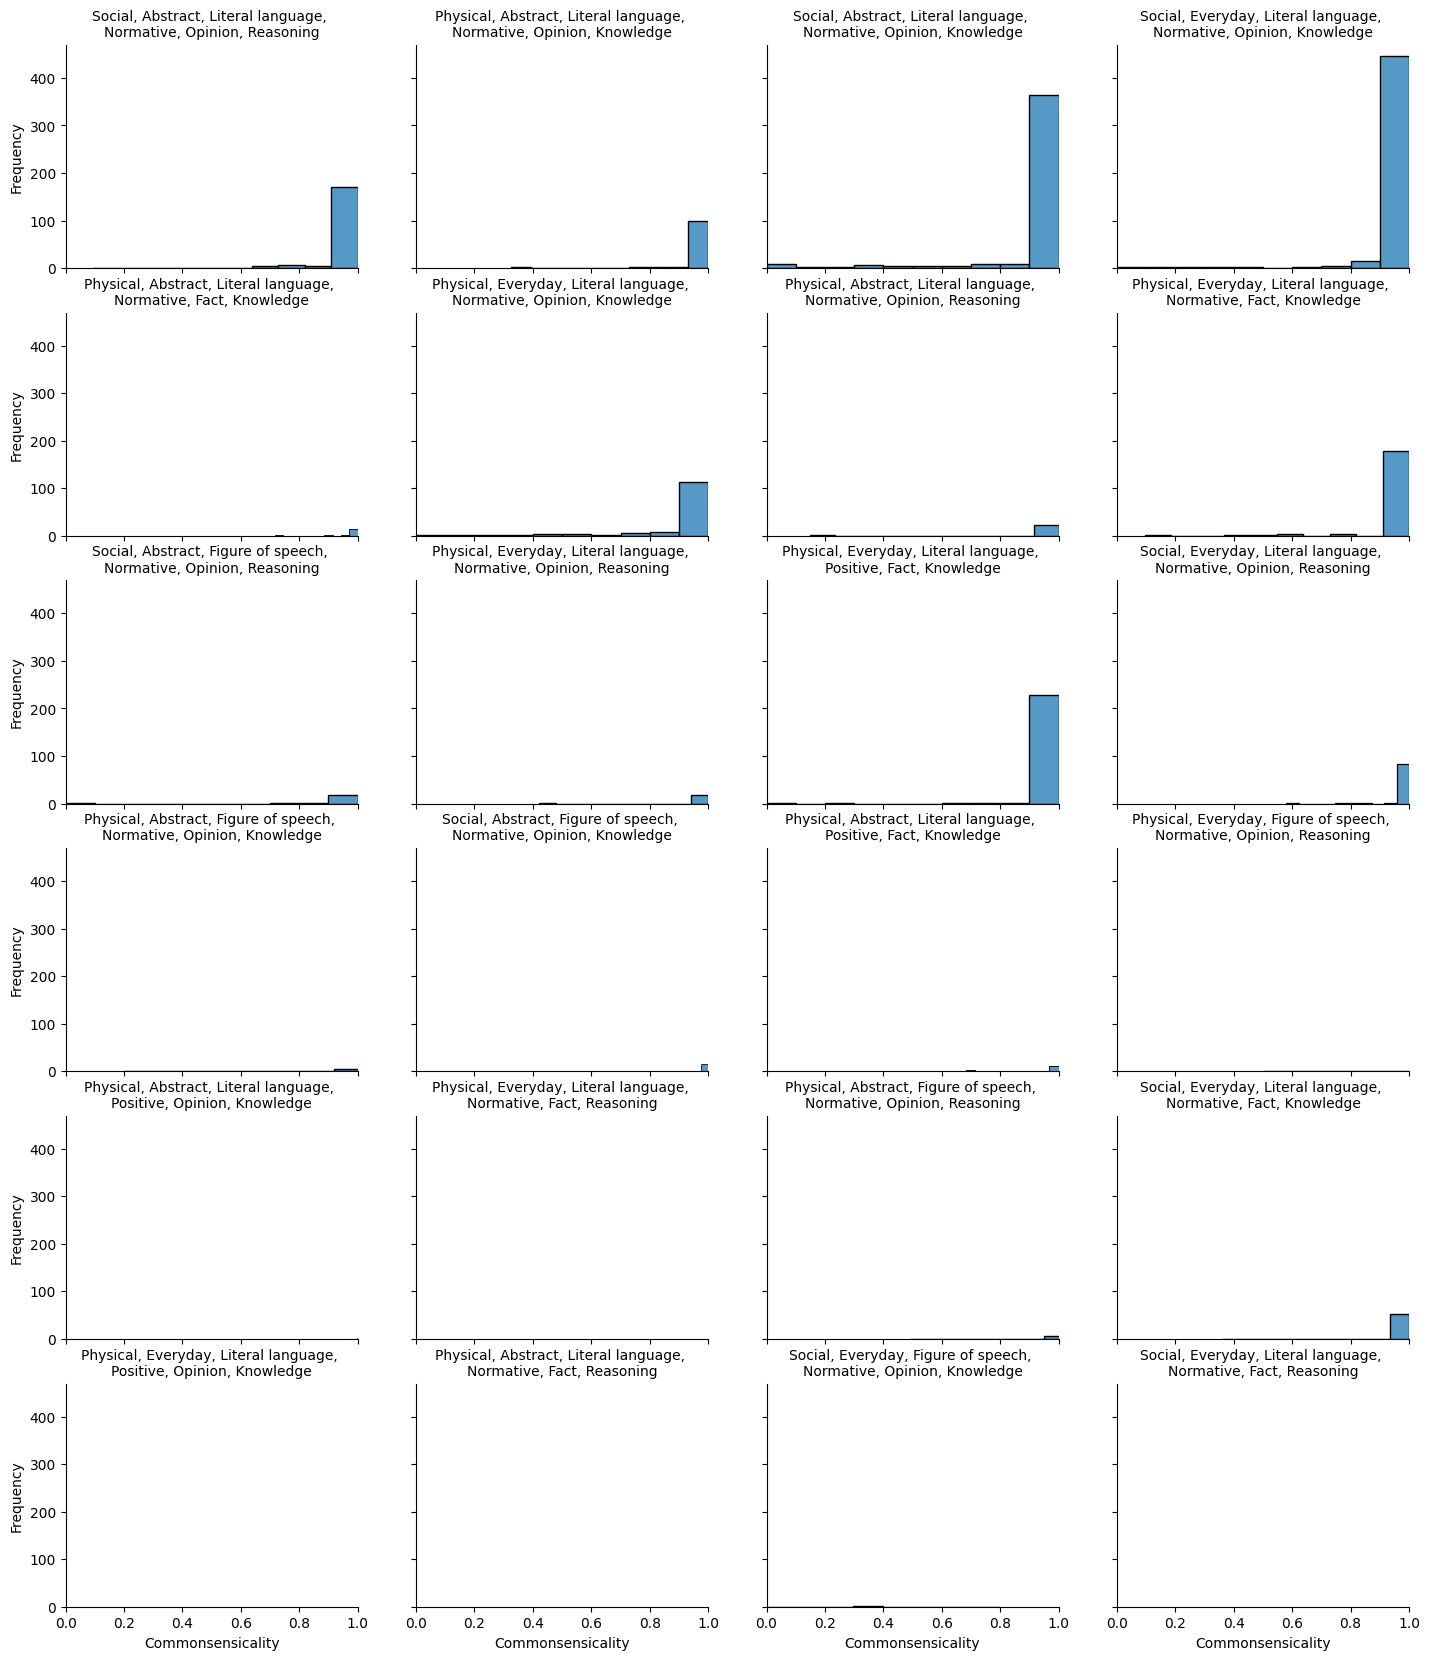

In [46]:
replace_dict = {
    "behavior": {False: "Physical", True: "Social"},
    "everyday": {False: "Abstract", True: "Everyday"},
    "figure_of_speech": {False: "Literal language", True: "Figure of speech"},
    "judgment": {False: "Positive", True: "Normative"},
    "opinion": {False: "Fact", True: "Opinion"},
    "reasoning": {False: "Knowledge", True: "Reasoning"},
}

plot_df = final_df.copy()


for column in replace_dict.keys():
    plot_df[column] = plot_df[column].map(replace_dict[column])


plot_df["config"] = (
    plot_df["behavior"]
    + ", "
    + plot_df["everyday"]
    + ", "
    + plot_df["figure_of_speech"]
    + ", \n"
    + plot_df["judgment"]
    + ", "
    + plot_df["opinion"]
    + ", "
    + plot_df["reasoning"]
)


unique_configs = plot_df["config"].unique()


plot_df = plot_df[plot_df["config"].isin(unique_configs)]


num_columns = 4
num_rows = len(unique_configs) // num_columns + 1


g = sns.FacetGrid(
    plot_df, col="config", col_wrap=num_columns, height=3, aspect=1.2
).set(xlim=(0, 1))
g.map(sns.histplot, "commonsensicality", bins=10, kde=False)

g.set_titles(col_template="{col_name}", fontsize=2)
g.set_axis_labels("Commonsensicality", "Frequency")
plt.subplots_adjust(top=0.9, hspace=0.2, wspace=0.2)
plt.show()

,0,1
0,"(False, False, False, False, False, False)",stateme...
1,"(False, False, False, False, True, False)",statemen...
2,"(False, False, False, True, False, False)",...
3,"(False, False, False, True, False, True)",statement ...
4,"(False, False, False, True, True, False)",...
5,"(False, False, False, True, True, True)",...
6,"(False, False, True, True, True, False)",...
7,"(False, False, True, True, True, True)",...
8,"(False, True, False, False, False, False)",...
9,"(False, True, False, False, True, False)",s...


In [79]:
final_df = final_df.drop_duplicates(subset=["statement"])

In [196]:
# Specify the columns to group by
group_columns = [
    "behavior",
    "everyday",
    "figure_of_speech",
    "judgment",
    "opinion",
    "reasoning",
]


grouped = final_df.groupby(group_columns)

samples = []

for group_name, group_df in grouped:
    group_size = len(group_df)

    if group_size >= 15:
        group_sorted = group_df.sort_values(by="commonsensicality")
        print(group_sorted)

        indices = np.linspace(0, group_size - 1, 15).astype(int)
        selected_samples = group_sorted.iloc[indices]

        samples.append(selected_samples)
    else:
        continue


selected_df = pd.concat(samples).reset_index(drop=True)

                                           statement        hash  behavior  \
942                   A rising tide lifts all boats.  f7d16a69eb     False   
665                  Every cloud has a silver lining  1b9ca3eb76     False   
261             It's always darkest before the dawn.  cbaa77873a     False   
548                        Burning the midnight oil.  a54c149e0a     False   
752              Speak softly and carry a big stick.  a57ffa00e1     False   
814             Don't cast your pearls before swine.  538fe91420     False   
272                The pot calling the kettle black.  83c2cb50d9     False   
1246            An apple a day keeps the doctor away  2339658d13     False   
704                            Time heals all wounds  d6d0a742db     False   
1002                         Through thick and thin.  cc86d19c2c     False   
159            Out of the frying pan, into the fire.  469aabacc5     False   
578                             Rain on your parade.  d8bff9fd6b

In [201]:
condition = (
    (selected_df["behavior"] == True)
    & (selected_df["everyday"] == False)
    & (selected_df["figure_of_speech"] == False)
    & (selected_df["judgment"] == True)
    & (selected_df["opinion"] == True)
    & (selected_df["reasoning"] == False)
)

# Filter the DataFrame based on the condition
selected_df[condition][
    [
        "statement",
        "commonsensicality",
        "behavior",
        "everyday",
        "figure_of_speech",
        "judgment",
        "opinion",
        "reasoning",
    ]
]

,statement,commonsensicality,behavior,everyday,figure_of_speech,judgment,opinion,reasoning
60,To fall by the wayside.,0.045645,True,False,False,True,True,False
61,The world is your oyster.,0.540422,True,False,False,True,True,False
62,Forgive and forget.,0.882792,True,False,False,True,True,False
63,Much ado about nothing.,0.969405,True,False,False,True,True,False
64,Instincts should be trusted.,0.995417,True,False,False,True,True,False
65,Keep your friends close and your enemies closer,0.999110,True,False,False,True,True,False
66,A problem shared is a problem halved.,0.999806,True,False,False,True,True,False
67,Good news travels fast.,0.999941,True,False,False,True,True,False
68,"When life gives you lemons, make lemonade.",0.999981,True,False,False,True,True,False
69,It takes a village to raise a child.,0.999992,True,False,False,True,True,False


In [174]:
selected_df

,statement,hash,behavior,everyday,figure_of_speech,judgment,opinion,reasoning,statement_id,i_agree,i_agree_probability,others_agree,others_agree_probability,statement_r,awareness,consensus,commonsensicality,nlp_score
0,A rising tide lifts all boats.,f7d16a69eb,False,False,False,True,True,False,942,yes,0.705785,yes,0.998968,A rising tide lifts all boats.,0.706817,0.169390,0.346017,"(A, rising, tide, lifts, all, boats, .)"
1,Every cloud has a silver lining,1b9ca3eb76,False,False,False,True,True,False,665,yes,0.777300,yes,0.957912,Every cloud has a silver lining,0.819388,0.307581,0.502024,"(Every, cloud, has, a, silver, lining)"
2,Burning the midnight oil.,a54c149e0a,False,False,False,True,True,False,548,yes,0.893309,yes,0.851953,Burning the midnight oil.,0.958644,0.618769,0.770181,"(Burning, the, midnight, oil, .)"
3,Don't cast your pearls before swine.,538fe91420,False,False,False,True,True,False,814,yes,0.999960,yes,0.867036,Don't cast your pearls before swine.,0.867076,0.999840,0.931094,"(Do, n't, cast, your, pearls, before, swine, .)"
4,An apple a day keeps the doctor away,2339658d13,False,False,False,True,True,False,1246,no,0.993307,yes,0.999979,An apple a day keeps the doctor away,0.993329,0.973408,0.983318,"(An, apple, a, day, keeps, the, doctor, away)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Honesty breeds trust.,fe8892fbb7,True,True,False,True,True,True,747,yes,1.000000,yes,1.000000,Honesty breeds trust.,1.000000,1.000000,1.000000,"(Honesty, breeds, trust, .)"
176,Pets often bring joy to their owners.,5b3406147e,True,True,False,True,True,True,1908,yes,1.000000,yes,1.000000,Pets often bring joy to their owners.,1.000000,1.000000,1.000000,"(Pets, often, bring, joy, to, their, owners, .)"
177,Honoring commitments builds trust.,0bdfe8901e,True,True,False,True,True,True,1070,yes,1.000000,yes,1.000000,Honoring commitments builds trust.,1.000000,1.000000,1.000000,"(Honoring, commitments, builds, trust, .)"
178,Arguing with others can strain relationships.,ebb634eba6,True,True,False,True,True,True,1843,yes,1.000000,yes,1.000000,Arguing with others can strain relationships.,1.000000,1.000000,1.000000,"(Arguing, with, others, can, strain, relations..."


In [197]:
selected_df.to_csv("selected_statements-new.csv", index=False)

In [ ]:
old_selected_df.to_csv("selected_statements.csv", index=False)

In [204]:
platform_statements = pd.read_csv("selected_statements_f.csv")

In [203]:
filter_ddddd.to_csv("selected_statements_ff.csv", index=False)

In [195]:
df_filtered = filter_ddddd[filter_ddddd["Unnamed: 1"] != "X"]
merged_df = pd.merge(
    selected_df,
    df_filtered,
    left_on="statement",
    right_on="selected_statements",
    how="left",
    indicator=True,
)

# Filter to get rows that are only in selected_df
result_df = merged_df[merged_df["_merge"] == "left_only"]

# Select relevant columns
result_df = result_df[['statement', 'hash', 'behavior', 'everyday', 'figure_of_speech', 'judgment', 'opinion', 'reasoning', 'statement_id', 'i_agree', 'i_agree_probability', 'others_agree', 'others_agree_probability', 'statement_r', 'awareness', 'consensus', 'commonsensicality', 'nlp_score']]

result_df

,statement,hash,behavior,everyday,figure_of_speech,judgment,opinion,reasoning,statement_id,i_agree,i_agree_probability,others_agree,others_agree_probability,statement_r,awareness,consensus,commonsensicality,nlp_score
0,A rising tide lifts all boats.,f7d16a69eb,False,False,False,True,True,False,942,yes,0.705785,yes,0.998968,A rising tide lifts all boats.,0.706817,0.169390,0.346017,"(A, rising, tide, lifts, all, boats, .)"
2,Burning the midnight oil.,a54c149e0a,False,False,False,True,True,False,548,yes,0.893309,yes,0.851953,Burning the midnight oil.,0.958644,0.618769,0.770181,"(Burning, the, midnight, oil, .)"
3,Don't cast your pearls before swine.,538fe91420,False,False,False,True,True,False,814,yes,0.999960,yes,0.867036,Don't cast your pearls before swine.,0.867076,0.999840,0.931094,"(Do, n't, cast, your, pearls, before, swine, .)"
4,An apple a day keeps the doctor away,2339658d13,False,False,False,True,True,False,1246,no,0.993307,yes,0.999979,An apple a day keeps the doctor away,0.993329,0.973408,0.983318,"(An, apple, a, day, keeps, the, doctor, away)"
6,"Out of the frying pan, into the fire.",469aabacc5,False,False,False,True,True,False,159,yes,0.999290,yes,0.998675,"Out of the frying pan, into the fire.",0.999385,0.997163,0.998273,"(Out, of, the, frying, pan, ,, into, the, fire..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Standing in line patiently shows respect for o...,fe6b33dcfe,True,True,False,True,True,True,1771,yes,1.000000,yes,1.000000,Standing in line patiently shows respect for o...,1.000000,1.000000,1.000000,"(Standing, in, line, patiently, shows, respect..."
174,Breaking promises damages trust.,2978d54d68,True,True,False,True,True,True,1024,yes,1.000000,yes,1.000000,Breaking promises damages trust.,1.000000,1.000000,1.000000,"(Breaking, promises, damages, trust, .)"
175,Honesty breeds trust.,fe8892fbb7,True,True,False,True,True,True,747,yes,1.000000,yes,1.000000,Honesty breeds trust.,1.000000,1.000000,1.000000,"(Honesty, breeds, trust, .)"
177,Honoring commitments builds trust.,0bdfe8901e,True,True,False,True,True,True,1070,yes,1.000000,yes,1.000000,Honoring commitments builds trust.,1.000000,1.000000,1.000000,"(Honoring, commitments, builds, trust, .)"


In [92]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 11.7 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [4]:
thousand_statements = pd.read_csv('1000_statements.csv')

In [8]:
thousand_statements.head()

,statement,source
0,"""A cloud with a silver lining"" means finding t...",gpt-4o design point
1,"""A friend in need is a friend indeed""; true fr...",gpt-4o design point
2,"""A hand up, not a handout""; Empowering others ...",gpt-4o design point
3,"""A healthy mind in a healthy body""; Mental and...",gpt-4o design point
4,"""A journey of a thousand miles begins with a s...",gpt-4o design point


In [13]:
thousand_statements = pd.read_csv("untitled-22.csv")

In [14]:
import spacy
nlp = spacy.load("en_core_web_lg")



In [15]:
thousand_statements['nlp_score'] = thousand_statements['statement'].apply(lambda x: nlp(x))
thousand_statements.head()

,statement,nlp_score
0,Algebra is the language translating reality in...,"(Algebra, is, the, language, translating, real..."
1,"Belief is the unseen wind, shaping the sails o...","(Belief, is, the, unseen, wind, ,, shaping, th..."
2,"Belief systems are the silent architects, cons...","(Belief, systems, are, the, silent, architects..."
3,"Beliefs weave the fabric of reality, blending ...","(Beliefs, weave, the, fabric, of, reality, ,, ..."
4,Calculus bridges finite points with infinite h...,"(Calculus, bridges, finite, points, with, infi..."


In [16]:
(thousand_statements.iloc[0].nlp_score).similarity(thousand_statements.iloc[1].nlp_score)

0.7530224323272705

In [17]:
similarity_matrix = np.zeros((thousand_statements.shape[0], thousand_statements.shape[0]))

for i in range(thousand_statements.shape[0]):
    for j in range(i+1, thousand_statements.shape[0]):
        similarity_matrix[i, j] = thousand_statements.iloc[i].nlp_score.similarity(thousand_statements.iloc[j].nlp_score)

In [19]:
simi_indexes = np.argwhere(similarity_matrix > 0.9)
simi_indexes

array([[   0,   93],
       [   0,   94],
       [   0, 1388],
       ...,
       [2073, 2075],
       [2074, 2075],
       [2079, 2080]])

In [20]:
drop_indexes = []

for idx in simi_indexes:
    print(thousand_statements.iloc[idx[0]].statement, thousand_statements.iloc[idx[1]].statement)
    if len(thousand_statements.iloc[idx[0]].statement) > len(thousand_statements.iloc[idx[1]].statement):
        drop_indexes.append(idx[0])
    else:
        drop_indexes.append(idx[1])


all_ids = set(drop_indexes)
thousand_statements.drop(all_ids, inplace=True)

Algebra is the language translating reality into abstract whispers. Algebra is the universal translator in the language of mathematics.
Algebra is the language translating reality into abstract whispers. Algebra is the universal translator weaving reality's equations into understanding.
Algebra is the language translating reality into abstract whispers. Physics is the language nature speaks, translating reality into quantifiable patterns.
Belief is the unseen wind, shaping the sails of the mind’s voyage across the sea of doubt. Faith anchors the soul in the turbulence of life's changing tides.
Belief is the unseen wind, shaping the sails of the mind’s voyage across the sea of doubt. Faith is the compass guiding humanity through the uncharted seas of existence.
Belief is the unseen wind, shaping the sails of the mind’s voyage across the sea of doubt. Religions are the stars guiding the lost through the labyrinth of life's night.
Belief is the unseen wind, shaping the sails of the mind’s

In [21]:
thousand_statements["committer"] = "Mark"
thousand_statements["elicitation"] = "GPT-4o"


thousand_statements.to_csv("raw_statements/2k_statements.csv", index=False)

In [22]:
df = pd.read_csv("raw_statements/2k_statements.csv")
ratings_df = pd.read_csv("features/ratings.csv")

In [23]:
def get_rating_dict(id, statement):
    return (
        {
            "custom_id": f"request-{id}-1",
            "method": "POST",
            "url": "/v1/chat/completions",
            "body": {
                "model": "gpt-4o",
                "messages": [
                    {
                        "role": "system",
                        "content": "You are an average person living in the United States. Your are given a statement. Rate the statement common sense level.",
                    },
                    {
                        "role": "user",
                        "content": f"Do you agree with this statement: `{statement}`? answer with only Yes Or No.",
                    },
                ],
                "max_tokens": 1,
                "logprobs": True,
                "top_logprobs": 10,
                "logit_bias": {
                    "6763": 100,
                    "13022": 100,
                    "1750": 100,
                    "3160": 100,
                },
            },
        },
        {
            "custom_id": f"request-{id}-2",
            "method": "POST",
            "url": "/v1/chat/completions",
            "body": {
                "model": "gpt-4o",
                "messages": [
                    {
                        "role": "system",
                        "content": "You are an average person living in the United States. Your are given a statement. Rate the statement common sense level.",
                    },
                    {
                        "role": "user",
                        "content": f"Do you think most people would agree with this statement: `{statement}`? answer with only Yes Or No.",
                    },
                ],
                "max_tokens": 1,
                "logprobs": True,
                "top_logprobs": 10,
                "logit_bias": {
                    "6763": 100,
                    "13022": 100,
                    "1750": 100,
                    "3160": 100,
                },
            },
        },
    )


joined_df = df[["statement"]].join(ratings_df, rsuffix="_r")


with open("statement-rating-batch.jsonl", "w") as file:
    for index, row in joined_df.iterrows():
        data = get_rating_dict(id=index, statement=row["statement"])
        file.write(json.dumps(data[0]) + "\n")
        file.write(json.dumps(data[1]) + "\n")

In [24]:
# Upload the batch input file
batch_rating_input_file = client.files.create(
    file=open("statement-rating-batch.jsonl", "rb"), purpose="batch"
)

# Create a batch
statement_rating_batch_job = client.batches.create(
    input_file_id=batch_rating_input_file.id,
    endpoint="/v1/chat/completions",
    completion_window="24h",
    metadata={"description": "statement rating batch"},
)

In [28]:
RUNNING_STATUSES = {"in_progress", "validating", "finalizing"}


def wait_for_batch_job_completion(client, batch_job_id, sleep_time=20, max_retries=30):
    retries = 0
    while retries < max_retries:
        try:
            batch_job = client.batches.retrieve(batch_job_id)
            status = batch_job.status
            print(f"Status: {status}")

            if status == "failed":
                print(f"Error: {batch_job.error}")
                return False
            elif status == "completed":
                print(f"Output File ID: {batch_job.output_file_id}")
                return batch_job.output_file_id
            elif status in RUNNING_STATUSES:
                sleep(sleep_time)
                retries += 1
            else:
                print(f"Unexpected status: {status}")
                return False
        except Exception as e:
            print(f"An error occurred: {e}")
            sleep(sleep_time)
            retries += 1

    print("Max retries exceeded. Exiting.")
    return False


output_file_id = wait_for_batch_job_completion(client, statement_rating_batch_job.id)
if output_file_id:
    print(f"Batch job completed successfully. Output File ID: {output_file_id}")
else:
    print("Batch job did not complete successfully.")

Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: in_progress
Status: finalizing
Status: finalizing
Status: finalizing
Status: finalizing
Status: finalizing
Status: finalizing
Status: completed
Output File ID: file-gV39eI9qQv5Qc4kNKmZrd6mB
Batch job completed successfully. Output File ID: file-gV39eI9qQv5Qc4kNKmZrd6mB


In [29]:
if statement_rating_batch_job.status == "completed":
    print("Batch job completed")
    output_rating_file = client.files.content(statement_rating_batch_job.output_file_id)
else:
    print("Batch job status:", statement_rating_batch_job.status)


Batch job status: in_progress


In [32]:
# with open("statement-rating-batch-output.jsonl", "w") as file:
#     file.write(output_rating_file.text)

statement_list = []

with open("statement-rating-batch-output.jsonl", "r") as file:
    for idx, line in enumerate(file):
        if idx % 2 == 0:
            new_statement = {}

            data = json.loads(line)
            statement_id = data["custom_id"].split("-")[1]

            answer = data["response"]["body"]
            answer_dist = clean_logprobs(answer, ["yes", "no"])

            new_statement["statement_id"] = int(statement_id)
            new_statement["i_agree"] = (
                answer_dist["yes"] > answer_dist["no"] and "yes" or "no"
            )
            new_statement["i_agree_probability"] = max(
                answer_dist["yes"], answer_dist["no"]
            )

        else:
            data = json.loads(line)
            statement_id = data["custom_id"].split("-")[1]

            answer = data["response"]["body"]
            answer_dist = clean_logprobs(answer, ["yes", "no"])

            new_statement["others_agree"] = (
                answer_dist["yes"] > answer_dist["no"] and "yes" or "no"
            )
            new_statement["others_agree_probability"] = max(
                answer_dist["yes"], answer_dist["no"]
            )

            statement_list.append(new_statement)



rated_statements_df = pd.DataFrame(statement_list)


In [33]:
# awareness: (r) => 1 - op.abs(r.others_agree - r.I_agree),
rated_statements_df['awareness'] = 1 - abs(rated_statements_df['others_agree_probability'] - rated_statements_df['i_agree_probability'])

# consensus: (r) => (0.25 - r.I_agree * (1 - r.I_agree)) * 4
rated_statements_df['consensus'] = (0.25 - rated_statements_df['i_agree_probability'] * (1 - rated_statements_df['i_agree_probability'])) * 4

# Commonsensicality: (r) => op.sqrt(r.awareness * r.consensus)
rated_statements_df['commonsensicality'] = np.sqrt(rated_statements_df['awareness'] * rated_statements_df['consensus'])

rated_statements_df

,statement_id,i_agree,i_agree_probability,others_agree,others_agree_probability,awareness,consensus,commonsensicality
0,0,yes,0.999999,yes,0.999999,0.999999,0.999997,0.999998
1,1,yes,1.000000,yes,1.000000,1.000000,1.000000,1.000000
2,2,yes,0.999987,yes,0.999290,0.999303,0.999948,0.999626
3,3,yes,0.999904,yes,0.999769,0.999866,0.999616,0.999741
4,4,no,0.998499,no,0.999374,0.999125,0.994004,0.996561
...,...,...,...,...,...,...,...,...
1231,1231,yes,0.999996,yes,0.999996,1.000000,0.999985,0.999993
1232,1232,yes,0.999995,yes,0.999994,0.999999,0.999978,0.999989
1233,1233,yes,0.989013,no,0.979668,0.990655,0.956535,0.973445
1234,1234,yes,0.999995,yes,0.999983,0.999989,0.999978,0.999984


In [35]:
design_point_df = joined_df.join(
    rated_statements_df[["awareness", "consensus", "commonsensicality"]]
)
design_point_df

,statement,statement_r,hash,behavior,everyday,figure_of_speech,judgment,opinion,reasoning,awareness,consensus,commonsensicality
0,Algebra is the language translating reality in...,Algebra is the language translating reality in...,2b2a7db339,0,0,0,1,1,0,0.999999,0.999997,0.999998
1,Calculus bridges finite points with infinite h...,Calculus bridges finite points with infinite h...,e14cd66931,0,0,0,0,0,0,1.000000,1.000000,1.000000
2,Geometry shapes the universe's unseen architec...,Geometry shapes the universe's unseen architec...,568f7f16ea,0,0,0,0,0,0,0.999303,0.999948,0.999626
3,"Gravity is the universe's anchor, grounding co...","Gravity is the universe's anchor, grounding co...",f77ebaac7f,0,0,0,0,0,0,0.999866,0.999616,0.999741
4,Infinity is the mirror reflecting mathematics'...,Infinity is the mirror reflecting mathematics'...,ab575e41bd,0,0,0,1,1,0,0.999125,0.994004,0.996561
...,...,...,...,...,...,...,...,...,...,...,...,...
664,"Waterfalls are the world's natural symphonies,...","Waterfalls are the world's natural symphonies,...",f7d2dceee2,0,1,0,1,1,0,1.000000,0.999998,0.999999
665,Wave frequency can be calculated by dividing t...,Wave frequency can be calculated by dividing t...,57a565b599,0,1,0,0,0,0,0.999999,0.999999,0.999999
666,Wearing a seatbelt increases safety in vehicle...,Wearing a seatbelt increases safety in vehicle...,2ae8ed7450,0,1,0,0,0,0,0.999999,0.999997,0.999998
667,Weather patterns influence daily human activit...,Weather patterns influence daily human activit...,6369548d7c,0,1,0,0,0,0,0.999999,0.999994,0.999996


In [4]:
droped_df = pd.read_csv("10000_statements_cleaned_drop.csv")

used_df = pd.read_csv("statements.csv", delimiter="\t")

In [5]:
droped_df.drop(droped_df[droped_df.statement.isin(used_df.statement.values)].index, inplace=True)

In [42]:
design_point_df.to_csv("design_point_df.csv", index=False)

In [38]:
design_point_df = joined_df.join(
    rated_statements_df[["awareness", "consensus", "commonsensicality"]]
)


# Specify the columns to group by
group_columns = [
    "behavior",
    "everyday",
    "figure_of_speech",
    "judgment",
    "opinion",
    "reasoning",
]


grouped = design_point_df.groupby(group_columns)

samples = []

for group_name, group_df in grouped:
    group_size = len(group_df)

    if group_size >= 15:
        group_sorted = group_df.sort_values(by="commonsensicality")

        indices = np.linspace(0, group_size - 1, 15).astype(int)
        selected_samples = group_sorted.iloc[indices]

        samples.append(selected_samples)
    else:
        continue


# samples = []
# for group_name, group_df in grouped:
#     if len(group_df) >= 15:
#         selected_samples = group_df.sample(n=15, random_state=42)  #
#         samples.append(selected_samples)


selected_df = pd.concat(samples).reset_index(drop=True)

In [39]:
selected_df.to_csv("statements-5-10-2024.csv", index=False)
selected_df

,statement,statement_r,hash,behavior,everyday,figure_of_speech,judgment,opinion,reasoning,awareness,consensus,commonsensicality
0,Axioms are self-evident truths forming the fou...,Axioms are self-evident truths forming the fou...,ffb0bfd6ef,0,0,0,0,0,0,0.651379,0.999903,0.807042
1,Fiber is the broom sweeping the digestive trac...,Fiber is the broom sweeping the digestive trac...,4c7f49a980,0,0,0,0,0,0,0.994292,0.976496,0.985354
2,Geometry shapes the universe's unseen architec...,Geometry shapes the universe's unseen architec...,568f7f16ea,0,0,0,0,0,0,0.999303,0.999948,0.999626
3,Numbers weave patterns into the fabric of math...,Numbers weave patterns into the fabric of math...,c0f65ddc3a,0,0,0,0,0,0,0.999976,0.999890,0.999933
4,Physics principles are foundational to enginee...,Physics principles are foundational to enginee...,f197855d65,0,0,0,0,0,0,0.999993,0.999914,0.999954
...,...,...,...,...,...,...,...,...,...,...,...,...
130,Museum exhibits reflect cultural history and a...,Museum exhibits reflect cultural history and a...,40004bab94,1,1,0,1,1,0,1.000000,0.999999,1.000000
131,Culture influences how people interpret and ap...,Culture influences how people interpret and ap...,99a4d13366,1,1,0,1,1,0,1.000000,1.000000,1.000000
132,Nutritional advice often reflects societal vie...,Nutritional advice often reflects societal vie...,0997225966,1,1,0,1,1,0,1.000000,1.000000,1.000000
133,Film and cinema explore cultural themes and hu...,Film and cinema explore cultural themes and hu...,6d254d543c,1,1,0,1,1,0,1.000000,1.000000,1.000000


In [40]:
explored_dimensions = [
    {
        "behavior": 0,
        "everyday": 1,
        "figure_of_speech": 0,
        "judgment": 0,
        "opinion": 0,
        "reasoning": 0,
    },
    {
        "behavior": 1,
        "everyday": 1,
        "figure_of_speech": 0,
        "judgment": 1,
        "opinion": 1,
        "reasoning": 1,
    },
    {
        "behavior": 0,
        "everyday": 1,
        "figure_of_speech": 0,
        "judgment": 0,
        "opinion": 0,
        "reasoning": 0,
    },
    {
        "behavior": 1,
        "everyday": 0,
        "figure_of_speech": 0,
        "judgment": 1,
        "opinion": 1,
        "reasoning": 0,
    },
    {
        "behavior": 1,
        "everyday": 1,
        "figure_of_speech": 0,
        "judgment": 1,
        "opinion": 0,
        "reasoning": 0,
    },
    {
        "behavior": 1,
        "everyday": 1,
        "figure_of_speech": 0,
        "judgment": 1,
        "opinion": 1,
        "reasoning": 0,
    },
    {
        "behavior": 1,
        "everyday": 1,
        "figure_of_speech": 0,
        "judgment": 1,
        "opinion": 1,
        "reasoning": 1,
    },
    {
        "behavior": 0,
        "everyday": 0,
        "figure_of_speech": 0,
        "judgment": 1,
        "opinion": 1,
        "reasoning": 0,
    },
    {
        "behavior": 0,
        "everyday": 1,
        "figure_of_speech": 0,
        "judgment": 1,
        "opinion": 0,
        "reasoning": 0,
    },
    {
        "behavior": 0,
        "everyday": 1,
        "figure_of_speech": 0,
        "judgment": 1,
        "opinion": 1,
        "reasoning": 0,
    },
    {
        "behavior": 1,
        "everyday": 0,
        "figure_of_speech": 0,
        "judgment": 1,
        "opinion": 1,
        "reasoning": 1,
    },
]

for d in explored_dimensions:
    print(d)
    condition = (
        (selected_df["behavior"] == d["behavior"])
        & (selected_df["everyday"] == d["everyday"])
        & (selected_df["figure_of_speech"] == d["figure_of_speech"])
        & (selected_df["judgment"] == d["judgment"])
        & (selected_df["opinion"] == d["opinion"])
        & (selected_df["reasoning"] == d["reasoning"])
    )

    print(selected_df[condition].shape)

# Convert the dimensions list into a DataFrame
dimensions_df = pd.DataFrame(explored_dimensions)

# Drop duplicates in dimensions_df just in case
dimensions_df = dimensions_df.drop_duplicates()

# Now, perform an inner merge on the key columns
key_columns = [
    "behavior",
    "everyday",
    "figure_of_speech",
    "judgment",
    "opinion",
    "reasoning",
]
merged_df = selected_df.merge(dimensions_df, on=key_columns, how="left", indicator=True)

# Now, select the rows where the merge indicator is 'left_only' (i.e., no match found in dimensions_df)
filtered_df = merged_df[merged_df["_merge"] == "left_only"].drop(columns=["_merge"])

filtered_df

{'behavior': 0, 'everyday': 1, 'figure_of_speech': 0, 'judgment': 0, 'opinion': 0, 'reasoning': 0}
(15, 12)
{'behavior': 1, 'everyday': 1, 'figure_of_speech': 0, 'judgment': 1, 'opinion': 1, 'reasoning': 1}
(0, 12)
{'behavior': 0, 'everyday': 1, 'figure_of_speech': 0, 'judgment': 0, 'opinion': 0, 'reasoning': 0}
(15, 12)
{'behavior': 1, 'everyday': 0, 'figure_of_speech': 0, 'judgment': 1, 'opinion': 1, 'reasoning': 0}
(15, 12)
{'behavior': 1, 'everyday': 1, 'figure_of_speech': 0, 'judgment': 1, 'opinion': 0, 'reasoning': 0}
(0, 12)
{'behavior': 1, 'everyday': 1, 'figure_of_speech': 0, 'judgment': 1, 'opinion': 1, 'reasoning': 0}
(15, 12)
{'behavior': 1, 'everyday': 1, 'figure_of_speech': 0, 'judgment': 1, 'opinion': 1, 'reasoning': 1}
(0, 12)
{'behavior': 0, 'everyday': 0, 'figure_of_speech': 0, 'judgment': 1, 'opinion': 1, 'reasoning': 0}
(15, 12)
{'behavior': 0, 'everyday': 1, 'figure_of_speech': 0, 'judgment': 1, 'opinion': 0, 'reasoning': 0}
(15, 12)
{'behavior': 0, 'everyday': 1, 

,statement,statement_r,hash,behavior,everyday,figure_of_speech,judgment,opinion,reasoning,awareness,consensus,commonsensicality
0,Axioms are self-evident truths forming the fou...,Axioms are self-evident truths forming the fou...,ffb0bfd6ef,0,0,0,0,0,0,0.651379,0.999903,0.807042
1,Fiber is the broom sweeping the digestive trac...,Fiber is the broom sweeping the digestive trac...,4c7f49a980,0,0,0,0,0,0,0.994292,0.976496,0.985354
2,Geometry shapes the universe's unseen architec...,Geometry shapes the universe's unseen architec...,568f7f16ea,0,0,0,0,0,0,0.999303,0.999948,0.999626
3,Numbers weave patterns into the fabric of math...,Numbers weave patterns into the fabric of math...,c0f65ddc3a,0,0,0,0,0,0,0.999976,0.999890,0.999933
4,Physics principles are foundational to enginee...,Physics principles are foundational to enginee...,f197855d65,0,0,0,0,0,0,0.999993,0.999914,0.999954
5,Mathematics provides a framework for understan...,Mathematics provides a framework for understan...,e3bc9f1334,0,0,0,0,0,0,1.000000,0.999954,0.999977
6,Theorems discover patterns invisible to any un...,Theorems discover patterns invisible to any un...,e9baf163e6,0,0,0,0,0,0,0.999999,0.999968,0.999984
7,Mathematics describes relationships between nu...,Mathematics describes relationships between nu...,f573c31c32,0,0,0,0,0,0,0.999999,0.999981,0.999990
8,Gravity is the invisible thread stitching the ...,Gravity is the invisible thread stitching the ...,7b85bd8806,0,0,0,0,0,0,0.999998,0.999995,0.999997
9,Laws of physics dictate the universe's symphon...,Laws of physics dictate the universe's symphon...,a2a96a90f8,0,0,0,0,0,0,0.999999,0.999998,0.999998


In [115]:
# 0,1,0,1,1,0
condition = (
    (filtered_df["behavior"] == 0)
    & (filtered_df["everyday"] == 1)
    & (filtered_df["figure_of_speech"] == 0)
    & (filtered_df["judgment"] == 1)
    & (filtered_df["opinion"] == 1)
    & (filtered_df["reasoning"] == 0)
)

filtered_df[condition]

,statement,drop,length,statement_r,hash,behavior,everyday,figure_of_speech,judgment,opinion,reasoning,awareness,consensus,commonsensicality
45,Cycling keeps you young.,NaN,24,Cycling keeps you young.,757e0ecf17,0,1,0,1,1,0,0.867859,0.495483,0.655751
46,Baking is like therapy.,NaN,23,Baking is like therapy.,d467ed3737,0,1,0,1,1,0,0.972615,0.992308,0.982412
47,Claude Monet pioneered the Impressionist movem...,NaN,50,Claude Monet pioneered the Impressionist movem...,748a46281f,0,1,0,1,1,0,0.998514,0.999941,0.999227
48,Symphony unifies diverse musical elements.,NaN,42,Symphony unifies diverse musical elements.,a1abc85c43,0,1,0,1,1,0,0.999856,0.999941,0.999899
49,Luxembourg is small but beautiful.,NaN,34,Luxembourg is small but beautiful.,537c7fddc4,0,1,0,1,1,0,0.999978,0.999990,0.999984
50,"Monet's ""Water Lilies"" is an iconic impression...",NaN,58,"Monet's ""Water Lilies"" is an iconic impression...",228b8ceff7,0,1,0,1,1,0,1.000000,0.999987,0.999993
51,Walking dogs offers mutual exercise.,NaN,36,Walking dogs offers mutual exercise.,65f47dbd7e,0,1,0,1,1,0,0.999999,0.999996,0.999997
52,Modeling clay invites creativity.,NaN,33,Modeling clay invites creativity.,d0e98797f9,0,1,0,1,1,0,0.999999,0.999997,0.999998
53,Handwritten letters feel personal.,NaN,34,Handwritten letters feel personal.,9b62166734,0,1,0,1,1,0,1.000000,0.999999,0.999999
54,Beethoven's compositions have enduring influence.,NaN,49,Beethoven's compositions have enduring influence.,1ed22e1c24,0,1,0,1,1,0,1.000000,0.999999,0.999999


In [93]:
filtered_df.to_csv("statements.csv", index=False)

In [64]:
previous_filtered_df_1 = pd.read_csv('selected_statements_f.csv')


In [69]:
mask = droped_df['statement'].isin(previous_filtered_df['statement'])

droped_df = droped_df[~mask]

In [7]:
selected_df

,statement,drop,length,statement_r,hash,behavior,everyday,figure_of_speech,judgment,opinion,reasoning,awareness,consensus,commonsensicality
0,Chemical reactions often release energy.,NaN,40,Chemical reactions often release energy.,2a4234b2cd,0,1,0,0,0,0,0.999800,0.999985,0.999893
1,Earth has varied climates.,NaN,26,Earth has varied climates.,e423a8f082,0,1,0,0,0,0,1.000000,1.000000,1.000000
2,"In right-angled triangles, a^2 + b^2 = c^2.",NaN,43,"In right-angled triangles, a^2 + b^2 = c^2.",16f298d1a6,0,1,0,0,0,0,0.998675,0.999998,0.999337
3,Greece’s Acropolis is historically significant.,NaN,47,Greece’s Acropolis is historically significant.,9c31d89560,0,1,0,0,0,0,1.000000,1.000000,1.000000
4,Grass feels soft underfoot.,NaN,27,Grass feels soft underfoot.,e67c0d7e89,0,1,0,0,0,0,0.999999,0.999999,0.999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Comforting words ease difficult emotions.,NaN,41,Comforting words ease difficult emotions.,dcea0c474f,1,1,0,1,1,1,1.000000,1.000000,1.000000
116,Using please shows respect.,NaN,27,Using please shows respect.,45e8469c90,1,1,0,1,1,1,1.000000,0.999998,0.999999
117,A warm smile invites friendliness.,NaN,34,A warm smile invites friendliness.,56fbe30193,1,1,0,1,1,1,1.000000,1.000000,1.000000
118,Lending an ear shows empathy.,NaN,29,Lending an ear shows empathy.,8f67715fa7,1,1,0,1,1,1,0.999999,1.000000,0.999999


In [43]:
with open("statements.sql", "w") as file:
    for index, row in design_point_df.iterrows():
        statement = json.dumps(row["statement"])
        median = 1 if row["commonsensicality"] > 0.5 else 0

        sql = f"""
        INSERT INTO statements (
            statement, statementSource, origLanguage, published, statementMedian, createdAt, updatedAt, statementCategory, parentId
        ) VALUES (
            {statement}, 'GPT', 'En', 1, {median}, NOW(), NOW(), 'General reference', NULL
        );
        """
        file.write(sql + "\n")

In [ ]:
def get_meaning_dict(id, prompt):
    return {
        "custom_id": f"request-{id}",
        "method": "POST",
        "url": "/v1/chat/completions",
        "body": {
            "model": "gpt-4o",
            "messages": [
                {
                    "role": "system",
                    "content": "You are given a statement. Say if the statement makes sense or is meaningful to ask people about in a common sense survey. Answer with only Yes or No.",
                },
                {"role": "user", "content": prompt},
            ],
            "response_format": {"type": "json_object"},
            "max_tokens": 4094,
            "temperature": 1,
        },
    }


with open("statement-batch.jsonl", "w") as file:
    for i in range(0, 20):
        data = get_dict(i, prompt)
        file.write(json.dumps(data) + "\n")

In [3]:
metadata = {}

metadata.get('amir', 0)

metadata

{}

In [4]:
metadata

{}